<a href="https://colab.research.google.com/github/Patotricks15/Data-Science-and-Statistics/blob/master/QUANDO_AS_TECNOLOGIAS_ENCONTRAM_AS_POL%C3%8DTICAS_P%C3%9ABLICAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TECNOLOGIAS EM MEIO AS POLÍTICAS PÚBLICAS:** análise sobre a criminalidade em São Paulo a partir da plataforma.



#EXTRAÇÃO, LIMPEZA E ORGANIZAÇÃO DOS DADOS

# **Importações nescessarias:**

*   `import pandas as pd:` Importa a biblioteca pandas, usada para manipulação de dados em formato de tabelas (DataFrames).

*   `import matplotlib.pyplot as plt:` Importa a biblioteca matplotlib, usada para criar gráficos e visualizações.

*   `import numpy as np:` Importa a biblioteca numpy, usada para trabalhar com arrays e operações matemáticas.

*   `import seaborn as sns:` Importa a biblioteca seaborn, usada para criar gráficos estatísticos mais sofisticados e visualizações baseadas no matplotlib.

*   `%matplotlib inline:` Essa linha é específica para Jupyter Notebooks e garante que os gráficos sejam exibidos diretamente nas células do notebook.

*   `sns.set_style():` Define o estilo visual dos gráficos criados com o seaborn. Ele aplica um estilo de fundo e elementos de formatação para melhorar a aparência dos gráficos.

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
sns.set_style();

Carrega os dados, organiza a coluna 'time' como índice de data e exibe a primeira linha do conjunto de dados.

In [48]:
df = pd.read_csv('https://www.dropbox.com/s/ghgb8xggbhgyuk3/dataset-limpo.csv?dl=1', parse_dates=['time'])

df.index = pd.to_datetime(df['time'], infer_datetime_format=True)

df.head(1)

<ipython-input-48-172fe2bcdf1b>:3: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df.index = pd.to_datetime(df['time'], infer_datetime_format=True)


,id,bairro,created_at,descricao,endereco,id.1,ip_address_origin,latitude,longitude,registrou_bo,...,Estepe,MP4 ou Ipod,Móveis,Notebook,Outros,Relógio,Som,Tablet,Tv,time
time,,,,,,,,,,,,,,,,,,,,,
2010-12-20 20:30:00,49787,Butantã,2015-06-16 23:34:01.000,"5 bandidos, armas, entraram em casa e vasculha...","Avenida Trona Constanzo, 177, Butantã",49787,NaN,-23.580973,-46.719192,True,...,NaN,True,NaN,True,NaN,NaN,True,True,True,2010-12-20 20:30:00


Exibe informações gerais sobre o DataFrame df.

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12899 entries, 2010-12-20 20:30:00 to 2012-03-02 09:44:00
Data columns (total 36 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  12899 non-null  int64         
 1   bairro              11196 non-null  object        
 2   created_at          12899 non-null  object        
 3   descricao           12898 non-null  object        
 4   endereco            12899 non-null  object        
 5   id.1                12899 non-null  int64         
 6   ip_address_origin   11705 non-null  object        
 7   latitude            12899 non-null  float64       
 8   longitude           12899 non-null  float64       
 9   registrou_bo        12375 non-null  object        
 10  sexo                12899 non-null  int64         
 11  tipo_assalto_id     12899 non-null  int64         
 12  titulo              12899 non-null  object        
 13  uri        

Converte valores numéricos na coluna sexo para seus correspondentes rótulos de gênero ("MASCULINO" ou "FEMININO").

In [50]:
def genero(i):
    if i == 1:
        return 'MASCULINO'
    else:
        return 'FEMININO'

df['sexo'] = df['sexo'].apply(lambda i: genero(i))


Prepara o DataFrame df_clean para garantir que as colunas relacionadas a objetos ou itens (como "Bicicleta", "Celular") não tenham valores nulos e sejam tratadas como strings.

In [51]:
df.describe(include='O')

,bairro,created_at,descricao,endereco,ip_address_origin,registrou_bo,sexo,titulo,uri,Bicicleta,...,Equipamento de Som,Estepe,MP4 ou Ipod,Móveis,Notebook,Outros,Relógio,Som,Tablet,Tv
count,11196,12899,12898,12899,11705,12375,12899,12899,12899,256,...,239,324,552,45,764,5243,1350,106,443,178
unique,1577,12899,12898,11986,10432,2,2,10169,12899,1,...,1,1,1,1,1,1,1,1,1,1
top,São Paulo,2013-08-22 01:49:00.275,"Minha mochila estava nas costas, estava quase ...",Carregando endereço,127.0.0.1,True,MASCULINO,Fui assaltado voltando do trabalho,/denuncias/z3LYda-furto-dentro-do-onibus,True,...,True,True,True,True,True,True,True,True,True,True
freq,630,1,1,15,94,7340,7901,154,1,256,...,239,324,552,45,764,5243,1350,106,443,178


Prepara um DataFrame (df_clean) para que as colunas relacionadas aos objetos ou itens (como "Bicicleta", "Celular") tenham valores válidos (sem valores nulos) e sejam tratadas como strings, o que pode ser necessário para realizar análises ou modelagens posteriormente.

In [52]:
df_clean = df.copy()

bool_columns = ['Bicicleta', 'Bolsa ou Mochila', 'Carteira','Cartão de Crédito',
'Celular', 'Computador','DVD', 'Dinheiro' , 'Documentos','Equipamento de Som','Estepe', 'MP4 ou Ipod', 'Móveis',
'Notebook','Outros', 'Relógio', 'Som', 'Tablet', 'Tv', 'registrou_bo']

df_clean[bool_columns] = df_clean[bool_columns].fillna(False)
df_clean[bool_columns] = df_clean[bool_columns].astype(str)

df_clean.head()

<ipython-input-52-feebdfdf32a2>:7: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_clean[bool_columns] = df_clean[bool_columns].fillna(False)


,id,bairro,created_at,descricao,endereco,id.1,ip_address_origin,latitude,longitude,registrou_bo,...,Estepe,MP4 ou Ipod,Móveis,Notebook,Outros,Relógio,Som,Tablet,Tv,time
time,,,,,,,,,,,,,,,,,,,,,
2010-12-20 20:30:00,49787,Butantã,2015-06-16 23:34:01.000,"5 bandidos, armas, entraram em casa e vasculha...","Avenida Trona Constanzo, 177, Butantã",49787,NaN,-23.580973,-46.719192,True,...,False,True,False,True,False,False,True,True,True,2010-12-20 20:30:00
2012-01-11 14:00:00,10679,Itaquera,2013-09-11 18:26:31.819,"Meu caso foi para o Pequenas Causas, ganhamos ...","Avenida José Pinheiro Borges, 450-876 - Itaque...",10679,187.11.1.51,-23.540105,-46.462872,True,...,False,False,False,False,True,False,False,False,False,2012-01-11 14:00:00
2012-01-11 14:00:00,10682,Itaquera,2013-09-11 18:42:07.858,"Meu caso foi para o Pequenas Causas, ganhamos ...",Rua Corínthians - Itaquera - Shopping Metrô It...,10682,189.19.160.82,-23.541765,-46.469562,True,...,False,False,False,False,True,False,False,False,False,2012-01-11 14:00:00
2012-01-11 18:20:00,6166,Morumbi,2013-08-20 11:56:52.717,"Estava parada no semáforo, o bandido veio e es...","Rua Pasquale Gallupi, 347 - Morumbi, São Paulo...",6166,199.67.140.46,-23.611693,-46.725935,True,...,False,False,False,False,False,False,False,False,False,2012-01-11 18:20:00
2012-01-11 08:15:00,6521,Alto de Pinheiros,2013-08-20 17:41:21.569,Arrombaram o porta malas do meu carro e levara...,"Avenida Professor Fonseca Rodrigues, 1655 - Al...",6521,187.92.158.154,-23.544564,-46.721567,True,...,False,False,False,True,True,False,False,False,False,2012-01-11 08:15:00


Identifica e trata os dados ausentes no DataFrame df_clean, removendo as linhas com valores nulos na coluna 'bairro' e visualizando as primeiras linhas para verificar os dados após a limpeza.

In [53]:
(df_clean.isnull().sum() / df_clean.shape[0]).sort_values(ascending=False)
df_clean.dropna(subset=['bairro'], axis=0, inplace=True)
df.head()

,id,bairro,created_at,descricao,endereco,id.1,ip_address_origin,latitude,longitude,registrou_bo,...,Estepe,MP4 ou Ipod,Móveis,Notebook,Outros,Relógio,Som,Tablet,Tv,time
time,,,,,,,,,,,,,,,,,,,,,
2010-12-20 20:30:00,49787,Butantã,2015-06-16 23:34:01.000,"5 bandidos, armas, entraram em casa e vasculha...","Avenida Trona Constanzo, 177, Butantã",49787,NaN,-23.580973,-46.719192,True,...,NaN,True,NaN,True,NaN,NaN,True,True,True,2010-12-20 20:30:00
2012-01-11 14:00:00,10679,Itaquera,2013-09-11 18:26:31.819,"Meu caso foi para o Pequenas Causas, ganhamos ...","Avenida José Pinheiro Borges, 450-876 - Itaque...",10679,187.11.1.51,-23.540105,-46.462872,True,...,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,2012-01-11 14:00:00
2012-01-11 14:00:00,10682,Itaquera,2013-09-11 18:42:07.858,"Meu caso foi para o Pequenas Causas, ganhamos ...",Rua Corínthians - Itaquera - Shopping Metrô It...,10682,189.19.160.82,-23.541765,-46.469562,True,...,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,2012-01-11 14:00:00
2012-01-11 18:20:00,6166,Morumbi,2013-08-20 11:56:52.717,"Estava parada no semáforo, o bandido veio e es...","Rua Pasquale Gallupi, 347 - Morumbi, São Paulo...",6166,199.67.140.46,-23.611693,-46.725935,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012-01-11 18:20:00
2012-01-11 08:15:00,6521,Alto de Pinheiros,2013-08-20 17:41:21.569,Arrombaram o porta malas do meu carro e levara...,"Avenida Professor Fonseca Rodrigues, 1655 - Al...",6521,187.92.158.154,-23.544564,-46.721567,True,...,NaN,NaN,NaN,True,True,NaN,NaN,NaN,NaN,2012-01-11 08:15:00


#ANÁLISE EXPLORATÓRIA

---

Depois de limpar os dados, iremos explorá-los. A fim de auxiliar governo e cidadãos, uma plataforma deve ser capaz de fornecer a maior quantidade de dados que puder, e serão esses os dados a serem analisados.

*   **Quem** foi roubado?
*   **O que** foi roubado?
*   **Onde** foi roubado?
*   **Quando** foi roubado?

##QUEM FOI ROUBADO?

---
Se perguntar "quem?" é de grande importancia para formar uma base sobre o problema em questão. É impportante saber quem são os envolvidos no problema para que seeja possivel analisar e contorna-lo.

###Pessoas por gênero

####Estatística descritiva

Analisa a distribuição de sexo em um conjunto de dados (df), mais especificamente, calcula a quantidade e a porcentagem de homens e mulheres presentes na coluna sexo do DataFrame.

In [54]:
sexo = df['sexo'].value_counts()
homens = sexo['MASCULINO']
mulheres = sexo['FEMININO']
masc_porc = sexo['MASCULINO']/(sexo['MASCULINO'] + sexo['FEMININO'])*100
femi_porc = sexo['FEMININO']/(sexo['MASCULINO'] + sexo['FEMININO'])*100

Análise por gênero.

In [55]:
print('Homens: {} ({:.2f}%)'.format(homens,masc_porc))
print('Mulheres: {} ({:.2f}%)'.format(mulheres,femi_porc))

Homens: 7901 (61.25%)
Mulheres: 4998 (38.75%)


A análise fica melhor quando **mostramos** os dados:

####Visualização

Gráfico de pizza que mostra a distribuição do número de mortes por gênero (masculino e feminino) a partir dos dados de um DataFrame (df).

<ipython-input-56-dd46a976afc5>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sexo_num = [sexo[0],sexo[1]]


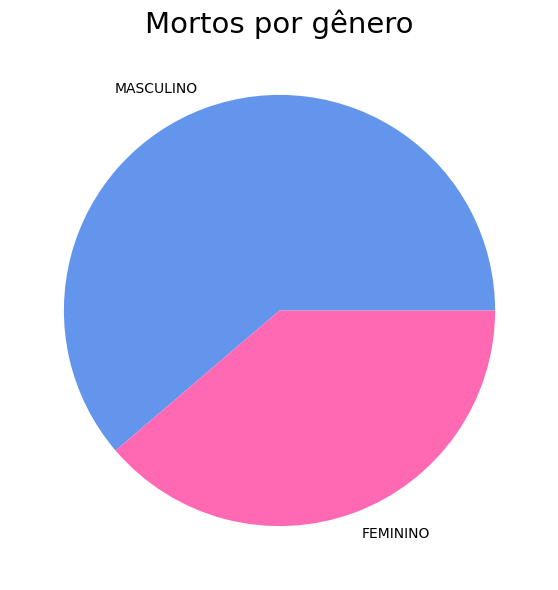

In [56]:
cor_genero = ['#6495ED','#FF69B4']
fig = plt.figure(figsize=(7,7))
sexo = df['sexo'].value_counts()
sexo_num = [sexo[0],sexo[1]]
plt.pie(sexo_num, labels=['MASCULINO','FEMININO'],colors=cor_genero)
plt.title('Mortos por gênero',fontsize=21);

###Pessoas que registraram boletim de ocorrência

####Estatística descritiva

####Visualização

Calculando e armazenando a quantidade de registros e a porcentagem de pessoas que registraram um boletim de ocorrência (True) e as que não registraram (False).

In [57]:
bo = df['registrou_bo'].value_counts()
regist = bo[True]
naoregist = bo[False]
regist_porc = regist/(regist + naoregist)*100
naoregist_porc = naoregist/(regist + naoregist)*100

Cassificação dos usários que registram Boletim de Ocorrência e os que não registraram:

In [58]:
print('Registraram BO: {} ({:.2f}%)'.format(regist,regist_porc))
print('Não registraram BO: {} ({:.2f}%)'.format(naoregist,naoregist_porc))

Registraram BO: 7340 (59.31%)
Não registraram BO: 5035 (40.69%)


Reinicia os índices do DataFrame df, fazendo com que eles comecem do zero e sejam numéricos de forma contínua.

In [59]:
df = df.reset_index(drop=True)

Gráfico de barras que mostra a quantidade de pessoas que registraram ou não um Boletim de Ocorrência (BO).

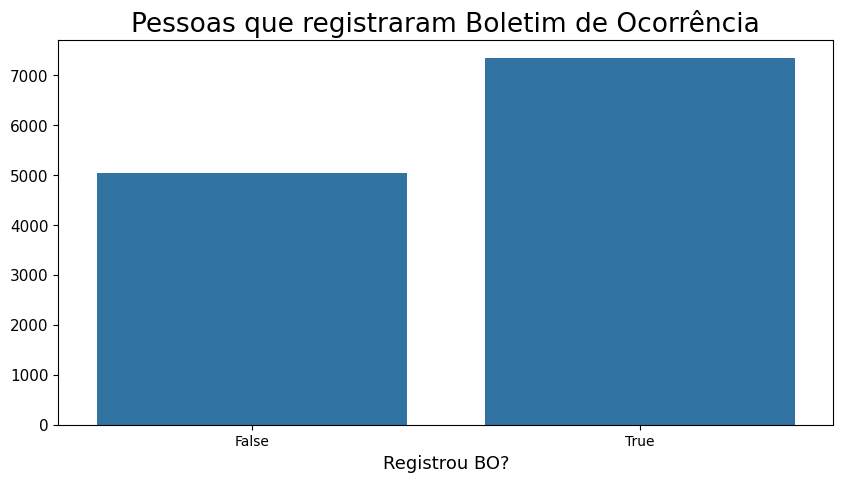

In [60]:
fig = plt.figure(figsize=(10,5))
sns.countplot(x='registrou_bo', data=df)
plt.xlabel('Registrou BO?',fontsize=13)
plt.ylabel('')
plt.yticks(fontsize=11)
plt.title('Pessoas que registraram Boletim de Ocorrência',fontsize=19);

Homens que registraram BO:

In [61]:
df[(df['sexo'] == 'MASCULINO')&(df['registrou_bo'] == True)].shape[0]

4487

Homens que não registraram BO:

In [62]:
df[(df['sexo'] == 'MASCULINO')&(df['registrou_bo'] == False)].shape[0]

3087

Mulheres que registraram BO:

In [63]:
df[(df['sexo']== 'FEMININO')&(df['registrou_bo'] == True)].shape[0]

2853

Mulheres que registraram BO:

In [64]:
df[(df['sexo']== 'FEMININO')&(df['registrou_bo'] == False)].shape[0]

1948

Gráfico de barras usando o Seaborn para visualizar a distribuição de pessoas que registraram um Boletim de Ocorrência (BO), divididos por gênero.

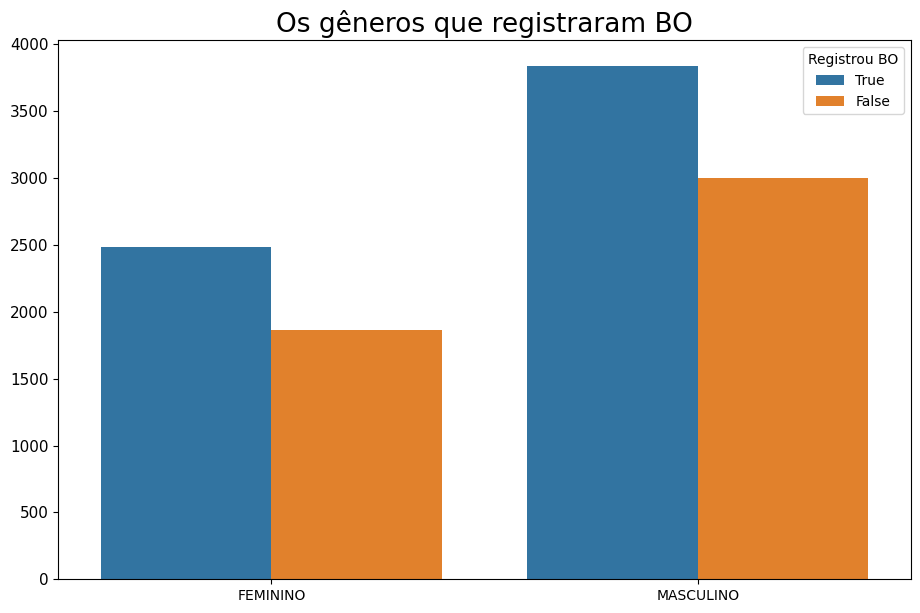

In [65]:
fig = plt.figure(figsize=(11,7))
sns.countplot(x='sexo',hue='registrou_bo',data=df_clean)
plt.xlabel('',fontsize=13)
plt.ylabel('')
plt.legend(title='Registrou BO')
plt.yticks(fontsize=11)
plt.title('Os gêneros que registraram BO',fontsize=19);

##O QUE FOI ROUBADO?

####Estatística descritiva

Exibe uma descrição estatística da coluna valor_prejuizo do DataFrame df.

In [66]:
df['valor_prejuizo'].describe()

,valor_prejuizo
count,12899.000000
mean,2745.264592
std,11115.126241
min,0.000000
25%,25.000000
50%,700.000000
75%,2000.000000
max,1000000.000000


Analísa dados categóricos (do tipo objeto) em um DataFrame df e fazer algumas manipulações para obter estatísticas descritivas.

In [67]:
df2 = df.describe(include='O')
df2_objetos = df.drop(columns=['bairro','id','created_at','descricao','endereco','id.1','ip_address_origin','latitude','longitude','registrou_bo','sexo','tipo_assalto_id','titulo','uri','user_id','valor_prejuizo','time'])
df2_objetos = df2_objetos.describe(include='O')
df2_objetos = df2_objetos.T
eixoy = df2_objetos.index
df2_objetos

,count,unique,top,freq
Bicicleta,256,1,True,256
Bolsa ou Mochila,3631,1,True,3631
Carteira,4243,1,True,4243
Cartão de Crédito,2776,1,True,2776
Celular,8377,1,True,8377
Computador,112,1,True,112
DVD,94,1,True,94
Dinheiro,1730,1,True,1730
Documentos,3660,1,True,3660
Equipamento de Som,239,1,True,239


 Calcula a porcentagem de cada valor na coluna 'count' do DataFrame df2_objetos em relação ao total da soma de todos os valores dessa coluna.

In [68]:
obj_porc = df2_objetos['count'] / df2_objetos['count'].sum()*100
obj_porc

,count
Bicicleta,0.750227
Bolsa ou Mochila,10.640917
Carteira,12.434428
Cartão de Crédito,8.135275
Celular,24.549424
Computador,0.328224
DVD,0.275474
Dinheiro,5.069894
Documentos,10.725903
Equipamento de Som,0.700407


Homens que não tiveram prejuízo

In [69]:
lista2 = []
lista2.append(df[(df['valor_prejuizo']== 0 ) & (df['sexo'] == 'MASCULINO')].shape[0])
for i in lista2:
  print(f'{i} homens tiveram R$0,00 reais de prejuizo')

1285 homens tiveram R$0,00 reais de prejuizo


Mulheres que não tiveram prejuízo

In [70]:
lista2 = []
lista2.append(df[(df['valor_prejuizo']== 0 ) & (df['sexo'] == 'FEMININO')].shape[0])
for i in lista2:
  print(f'{i} mulheres tiveram R$0,00 reais de prejuizo')

922 mulheres tiveram R$0,00 reais de prejuizo


Observa-se que:

*   A plataforma registrou **12899** casos de assalto nesse período de tempo

*   O maior prejuízo foi de **R$ 1 MILHÃO**

*   O valor **R$ 0,00** mostra que nem todos os crimes houveram prejuízos financeiros diretos

*   Foram registrados **1577** bairros diferentes


*   O item mais roubado foi o **celular** (**8377**)

*   O título mais comum para registro de crime foi "*Fui assaltado voltando do trabalho*", o que diz muito sobre a situação da segurança pública na cidade.

####Visualização

Plota um gráfico de barras com a frequência de diferentes tipos de objetos listados na variável df2_objetos.

<ipython-input-71-e8f3bc59db5a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'freq', y = df2_objetos.index, order = ['Móveis','DVD','Som','Computador','Tv','Bicicleta','Estepe','Tablet','MP4 ou Ipod','Relógio','Dinheiro','Cartão de Crédito','Bolsa ou Mochila','Carteira','Outros','Celular'], palette=paleta1,data = df2_objetos);


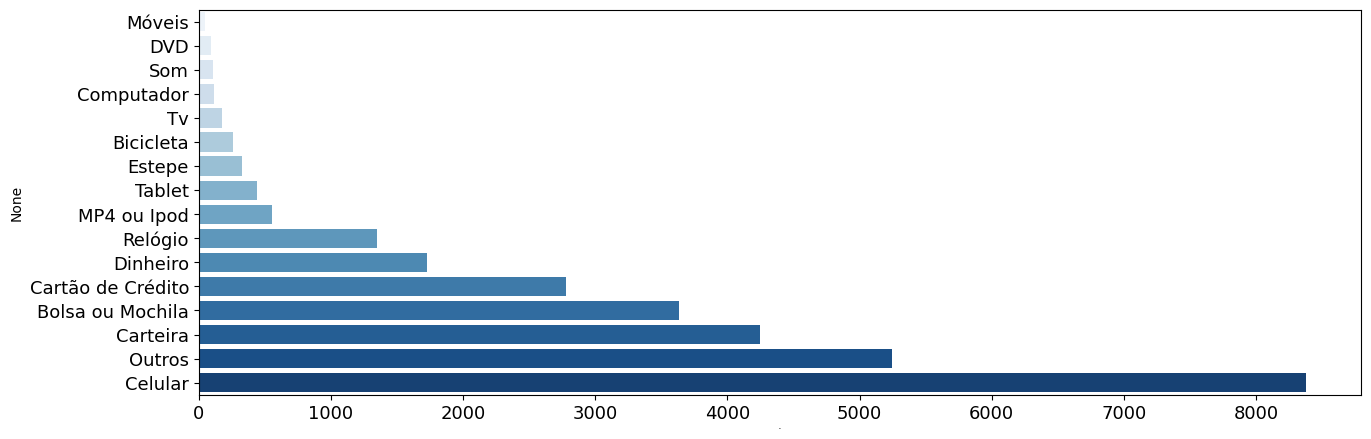

In [71]:
paleta1 = sns.color_palette("Blues",16)
fig = plt.figure(figsize=(15,5))
plt.yticks(fontsize=13)
plt.xticks(fontsize=13)
plt.xlabel('',fontsize=0)
sns.barplot(x = 'freq', y = df2_objetos.index, order = ['Móveis','DVD','Som','Computador','Tv','Bicicleta','Estepe','Tablet','MP4 ou Ipod','Relógio','Dinheiro','Cartão de Crédito','Bolsa ou Mochila','Carteira','Outros','Celular'], palette=paleta1,data = df2_objetos);

 Boxplot para visualizar a distribuição do valor do prejuízo (valor_prejuizo) entre os diferentes sexos (sexo) das vítimas, dividindo os dados com base em quem registrou ou não registrou o BO (registrou_bo).

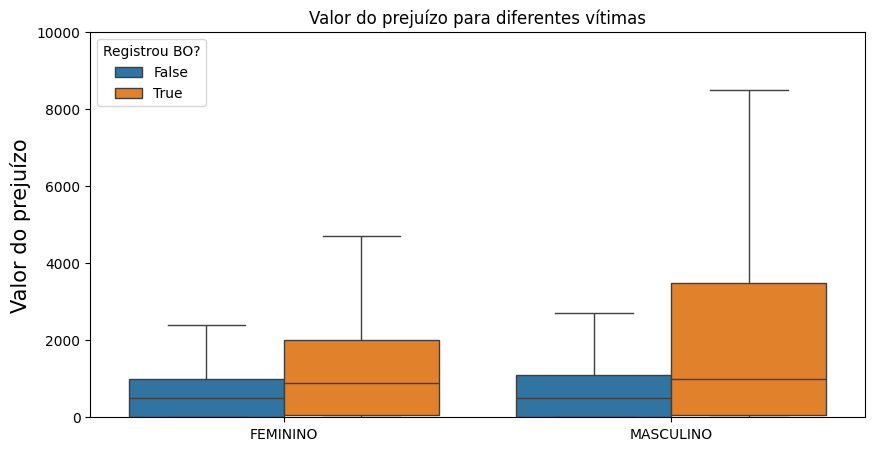

In [73]:
fig = plt.figure(figsize=(10,5))
sns.boxplot(x='sexo',y='valor_prejuizo',showfliers=False,hue='registrou_bo',data=df)
plt.ylim(0,10000)
plt.title('Valor do prejuízo para diferentes vítimas')
plt.legend(title='Registrou BO?')
plt.ylabel('Valor do prejuízo',fontsize=15)
plt.xlabel('');

Grafico para ver que o prejuizo do gênero feminino é mais concentrado na faixa 0 ~ 2500, enquanto que o do gênero masculino é mais "espalhado" (uniforme) ao longo dos valores de prejuízo.

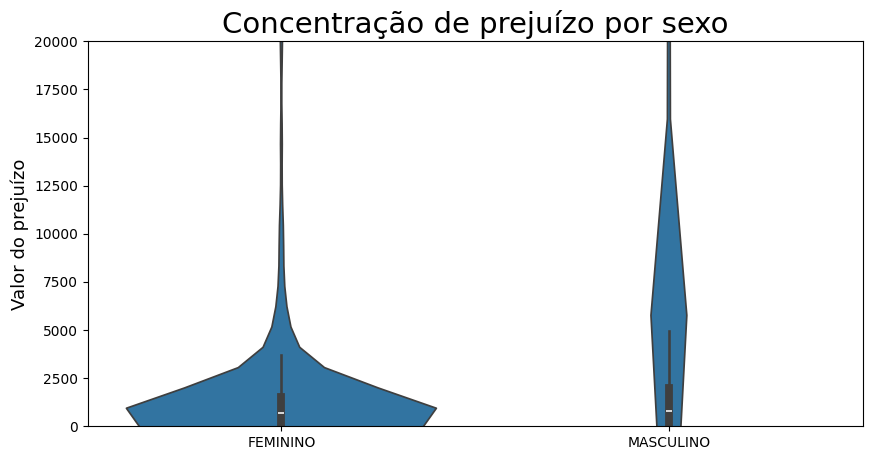

In [74]:
fig = plt.figure(figsize=(10,5))
sns.violinplot(x='sexo',y='valor_prejuizo',data=df)
plt.ylim(0,20000)
plt.title('Concentração de prejuízo por sexo',fontsize=21)
plt.ylabel('Valor do prejuízo',fontsize=13)
plt.xlabel('');

O código cria uma visualização que mostra as palavras mais frequentes na coluna descricao do DataFrame, removendo palavras comuns e irrelevantes (como "a", "de", "o", etc.).

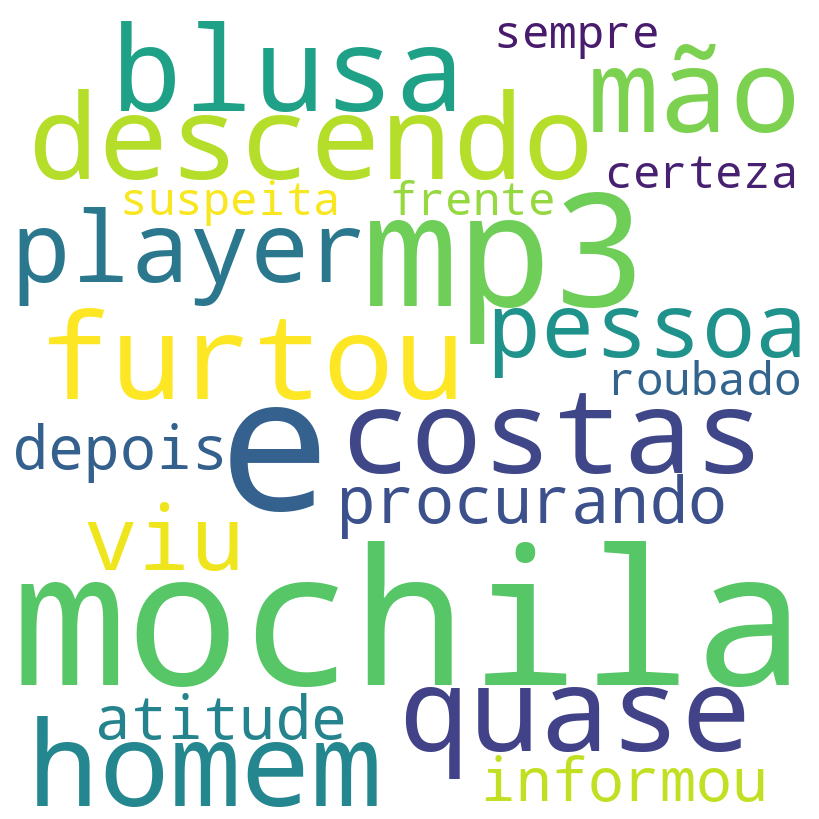

In [75]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
comment_words = ' '
stopwords = ['estava','para','largo','minha','uma','batata','teria','dica','cima','eu','que','meu','em','fica','um','o','os','as','a','ele','ela','da','do','nas','não','nos'] + list(STOPWORDS)

for valor in df.descricao:

   valor = str(valor)

   tokens = valor.split()

for i in range(len(tokens)):
    tokens[i] = tokens[i].lower()

for words in tokens:
    comment_words = comment_words + words + ' '


wordcloud = WordCloud(width = 800, height = 800,
            background_color ='white',
            stopwords = stopwords,
            min_font_size = 10).generate(comment_words)

plt.figure(figsize = (8, 10), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

Observa-se, palavras como "mochila", "homem", "mp3", "furto" são muito comuns, podendo traçar um perfil de descrição sobre o assaltante. Isso é importante para que as forças do Estado possam agir de forma menos irracional.

##ONDE FOI ROUBADO?

---
A localização é essencial ao analisar um aspecto social, pois a base da sociedade é estar imersa num território, o que nos torna intrinsicamente ligado ao local em que estamos. Logo abaixo do título, deixei um mapa que representa as ocorrências obtidas pela plataforma.


###Estatística descritiva

In [76]:
bairro_porc = df['bairro'].value_counts().max() / df['bairro'].value_counts().sum()*100
bairro_porc

np.float64(5.627009646302251)

O bairro que mais registrou ocorrências: São Paulo

In [77]:
df['bairro'].value_counts().max()

630

O bairro que menos registrou ocorrências:  Vila Picinin

In [78]:
df['bairro'].value_counts().min()

1

O fato de existir baixas ocorrências registradas não refletem **necessariamente** baixo índice de criminalidade, mas pode representar falta de acesso à internet e meios de comunicação.
E existem outros bairros que registraram menos ocorrências, mas a ordem alfabética fez com que Vila Picinin ficasse por último.

###Visualização

 Gráfico de barras horizontal usando o Seaborn para visualizar o número de crimes por bairro, com base em um DataFrame chamado df_clean

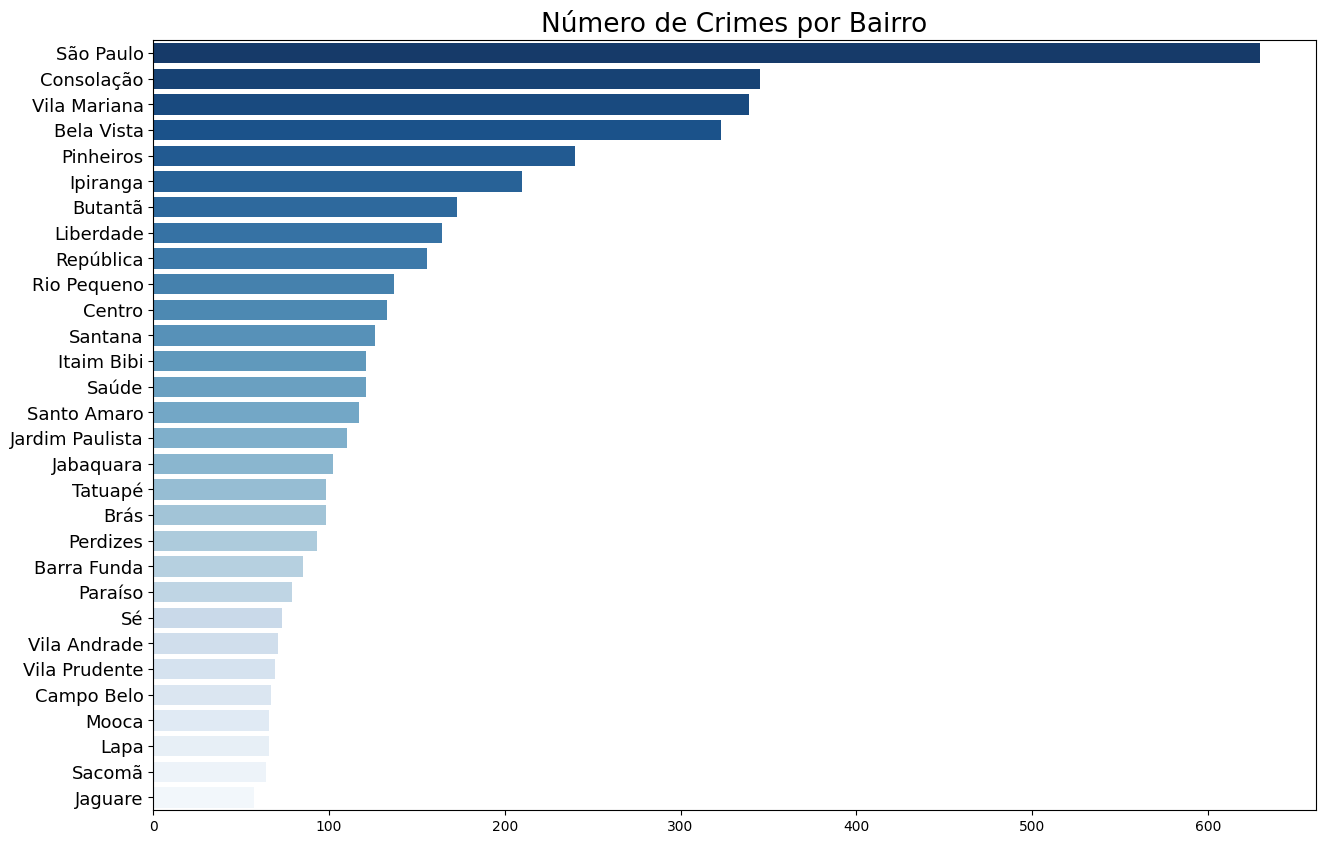

In [79]:
paleta2 = sns.color_palette("Blues_r", 30)
bairros = df_clean.bairro.value_counts().sort_values(ascending=False).iloc[:30]

fig = plt.figure(figsize=(15,10))
sns.barplot(x=bairros.values, y=bairros.index, hue=bairros.index, palette=paleta2, legend=False)

plt.ylabel('')
plt.xlabel('')
plt.yticks(fontsize=13)
plt.title('Número de Crimes por Bairro', fontsize=19)

plt.show()

##QUANDO FOI ROUBADO?

---
A última análise é em relação ao tempo. Visão dos **anos, meses e dias do mês** em que a plataforma mais registrou mais casos de assalto.


Contagem de ocorrências de cada ano presente no índice do DataFrame df_clean

In [80]:
df_clean.index.year.value_counts()

,count
time,
2014,4079
2013,2179
2016,1857
2017,1569
2015,929
2012,368
2018,196
2010,11
2011,8


Conta a quantidade de ocorrências de cada mês na coluna de índice do DataFrame df_clean, assumindo que o índice seja de tipo datetime.

In [81]:
df_clean.index.month.value_counts()

,count
time,
8,1290
10,1151
6,1107
7,1034
11,1020
9,1013
1,839
5,817
3,798


Conta quantas ocorrências existem para cada dia do mês no índice do DataFrame df_clean.

In [82]:
df_clean.index.day.value_counts()

,count
time,
11,463
15,446
10,443
20,442
14,412
8,405
1,403
16,395
13,384


Conta quantos registros existem para cada dia da semana (de segunda a domingo) no índice do DataFrame df_clean.

In [83]:
df_clean.index.weekday.value_counts()

,count
time,
4,1819
2,1797
3,1776
1,1658
5,1491
0,1420
6,1235


Cria uma visualização de barras que mostra o número de crimes por ano no DataFrame df_clean.

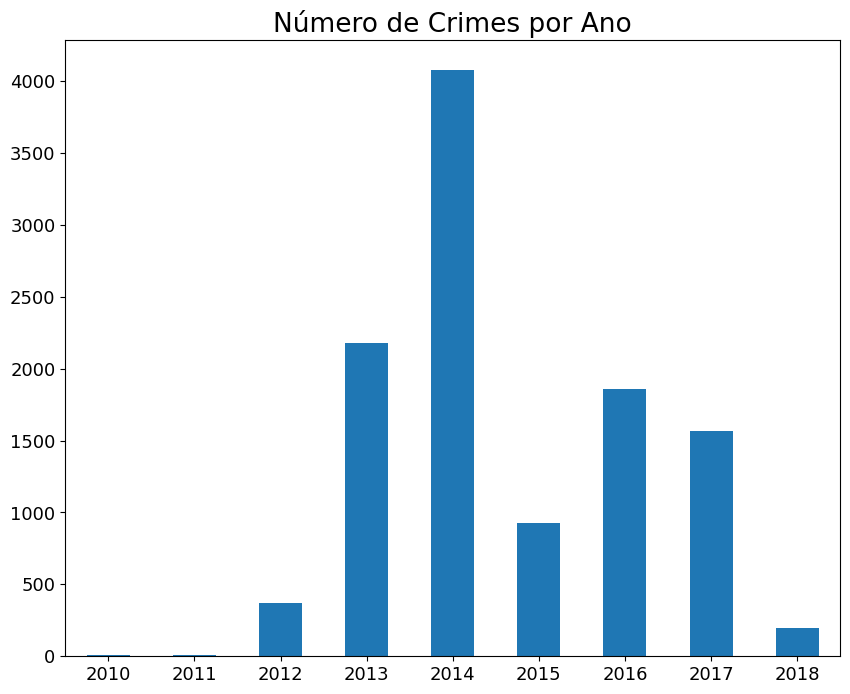

In [84]:
fig = plt.figure(figsize=(10,8))
df_clean.groupby([df_clean.index.year]).size().plot(kind='bar')

plt.title('Número de Crimes por Ano',fontsize=19)
plt.xlabel('')
plt.yticks(fontsize=13)
plt.xticks(fontsize=13,rotation=360);

Distribuição de registros por mês no ano

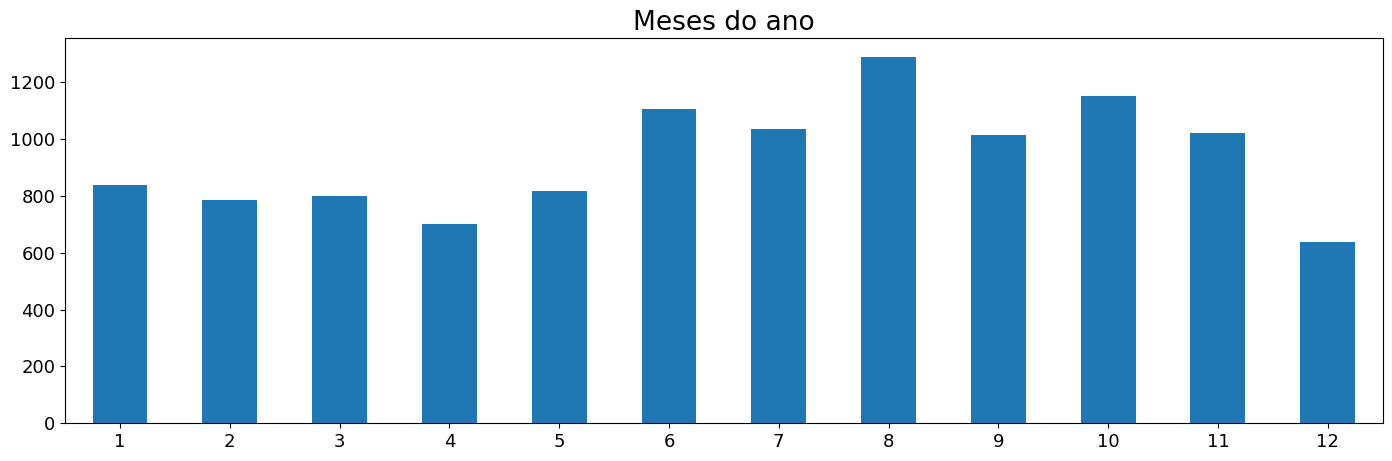

In [85]:
fig = plt.figure(figsize=(17,5))
df_clean.groupby([df_clean.index.month]).size().plot(kind='bar')
plt.title('Meses do ano',fontsize=19)
plt.xticks(fontsize=13,rotation=360)
plt.xlabel('')
plt.yticks(fontsize=13);

Gráfico de barras que mostra a quantidade de ocorrências registradas em cada dia do mês.

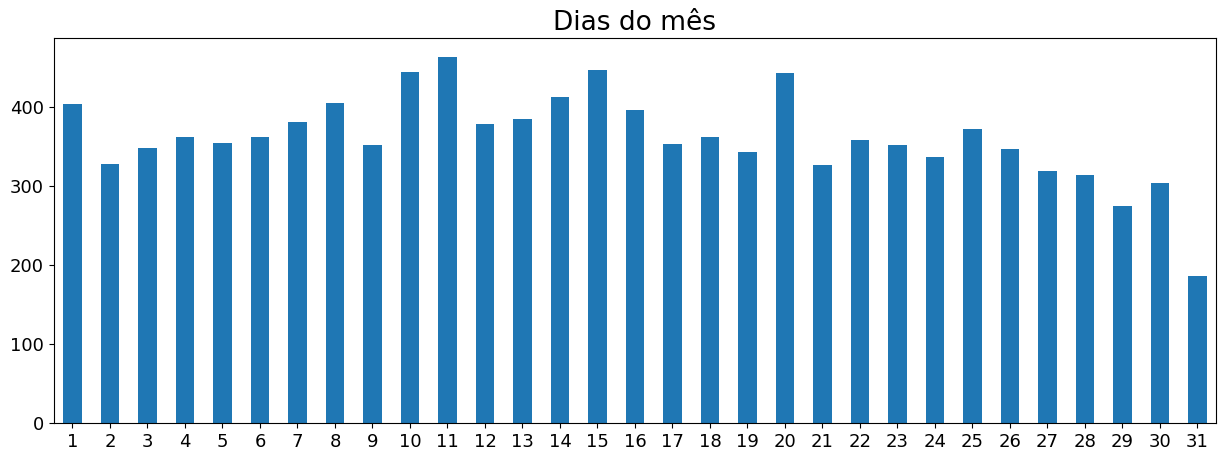

In [86]:
fig = plt.figure(figsize=(15,5))
df_clean.groupby([df_clean.index.day]).size().plot.bar()
plt.title('Dias do mês',fontsize=19)
plt.xticks(fontsize=13,rotation=360)
plt.xlabel('')
plt.yticks(fontsize=13);

Gráfico de barras que mostra a quantidade de ocorrências por dia da semana.

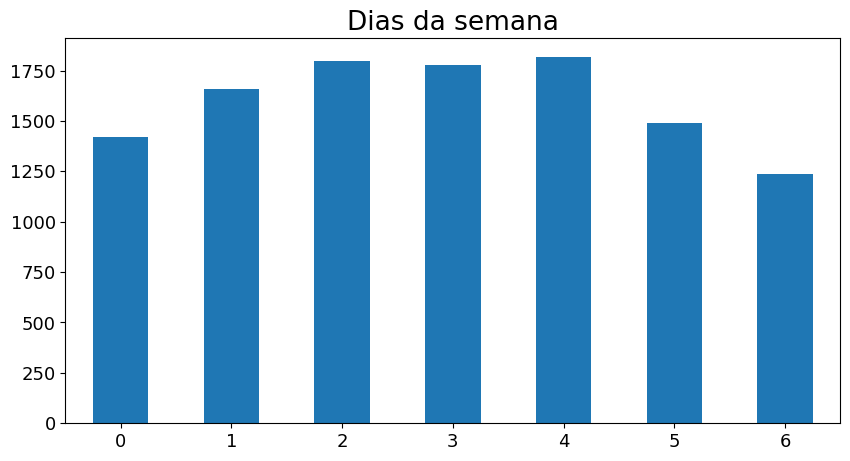

In [87]:
fig = plt.figure(figsize=(10,5))
df_clean.groupby([df_clean.index.weekday]).size().plot.bar()
plt.title('Dias da semana',fontsize=19)
plt.xticks(fontsize=13,rotation=360)
plt.xlabel('')
plt.yticks(fontsize=13);

#CONCLUSÕES

##Conclusão da análise

Temos, então, algumas conclusões a partir dos dados disponibilizados pela plataforma:

*   Os **homens** são as maiores vítimas dos crimes (**61,25%**);

*   O item mais roubado foi o **celular** (**24,54%**);

*   O maior prejuízo foi de **R$1.000.000** (UM MILHÃO);

*   A maioria das pessoas registraram BO (**59,31%**);

*   O bairro com mais ocorrência de crimes foi **São Paulo** (**5,62%**);

*   O **ano** em que mais foram registradas ocorrências: **2014**;

*   O **mês** em que mais foram registradas ocorrências: **Agosto**

*   O **dia do mês** em que mais foram registradas ocorrências: **10 a 15**

*   O **dia da semana** em que mais foram registradas ocorrências: **Quinta-feira**


##Conclusão final

---

Sabemos que dados são importantes para a tomada de decisões, o que nos falta é ter fácil acesso a esses dados. E é isso que a plataforma aqui analisada se propõe a fazer.

Vemos hoje muitas pessoas com tecnologias nas mãos, com tudo à um clique de distância, tendo o celular como extensão do próprio corpo. Não há nem a necessidade de consultar, pois as notificações baseadas na localização (GPS) do aparelho podem fazer todo o trabalho.

Em tempos de conexão, o governo deve se atualizar constantemente e informar suas instituições e seus cidadãos. O governo precisa estar apto às mudanças sociais provocadas pelas inovações tecnológicas, e se aproveitar dessas inovações para facilitar o convívio em sociedade. O tema aqui tratado foi sobre violência urbana, mas as inovações estão chegando em diversas áreas (**comunicação, emprego, saneamento, cultura, lazer, mobilidade urbana, etc**.) e isso deve ser aproveitado com o objetivo último de tornar as políticas públicas mais eficientes e levá-las até os locais de mais difícil acesso.

"As tecnologias sociais são produtos, técnicas ou metodologias reaplicáveis, desenvolvidas em interação com a comunidade, e que representem efetivas soluções de transformação social. São experiências inovadoras que contribuem para resolver grandes problemas sociais." [[3]](http://www.mobilizadores.org.br/entrevistas/tecnologias-sociais-possibilitam-modelos-alternativos-de-desenvolvimento/)

A sociedade pode levar vantagem disso se houverem parcerias que se dediquem à informar os cidadãos sobre o que está acontecendo em seu território e no seio da própria sociedade. Informar sobre a violência é algo crucial para quem deseja reduzir esses números, e ser informado é importante para quem deseja evitar ser assaltado. Então é de interesse do cidadão ser informado, e deve ser obrigação do governo e de suas instituições, informar.

“*Inovação não é feita apenas usando tecnologia. A tecnologia pode ser um meio, mas ver e transformar um jeito de fazer algo, mudar a forma como encaramos desafios, tudo isso pode ser visto e feito de forma inovadora.*” - Gustavo Maia

#REFERÊNCIAS

---
[1] http://www.ssp.sp.gov.br/transparenciassp/Default.aspx

[2] https://www.techtudo.com.br/tudo-sobre/onde-fui-roubado.html

[3] http://www.mobilizadores.org.br/entrevistas/tecnologias-sociais-possibilitam-modelos-alternativos-de-desenvolvimento/

## Leituras complementares:

https://www.colab.re/conteudo/tecnologia-um-meio-para-governos-inovarem

https://www.digix.com.br/tecnologia-no-setor-publico-quais-sao-os-desafios-e-necessidades/

https://www.e-gestaopublica.com.br/inovacao-e-governo/